#WORKSHEET - 10

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Necessary import throughout the worksheet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Naive Bayes Classifier for Spam or Ham Mails

## Import Necessary Libraries


In [14]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##Load the Data

In [15]:
data = pd.read_csv('/content/drive/MyDrive/Concepts and Technologies of AI/W10_dataset/spam_ham_dataset.csv')
data = data.drop(['Unnamed: 0'], axis = 1)
length = len(data['text'])
data.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


##Text Cleaning with NLTK Library

In [16]:
corpus = []

for i in range(0, length):
  # re to remove anything other than alphabets (punctuations)
  text = re.sub('[^a-zA-Z]', ' ', data['text'][i])

  # lower the text
  text = text.lower()

  # Stemming
  # 1. split
  text = text.split()
  # 2. apply stemming from PorterStemmer
  ps = PorterStemmer()
  all_stopwords = set(stopwords.words('english'))
  text = [ps.stem(word) for word in text if not word in all_stopwords]
  # 3. join stemmed words
  text = ' '.join(text)

  # Add to corpus
  corpus.append(text)

In [17]:
data_verify = data.copy()
data_verify['text'] = corpus
data_verify.head()

,label,text,label_num
0,ham,subject enron methanol meter follow note gave ...,0
1,ham,subject hpl nom januari see attach file hplnol...,0
2,ham,subject neon retreat ho ho ho around wonder ti...,0
3,spam,subject photoshop window offic cheap main tren...,1
4,ham,subject indian spring deal book teco pvr reven...,0


In [18]:
data_verify['cleanText'] = data_verify['text'].str.replace('subject','')
data_verify.head()

,label,text,label_num,cleanText
0,ham,subject enron methanol meter follow note gave ...,0,enron methanol meter follow note gave monday ...
1,ham,subject hpl nom januari see attach file hplnol...,0,hpl nom januari see attach file hplnol xl hpl...
2,ham,subject neon retreat ho ho ho around wonder ti...,0,neon retreat ho ho ho around wonder time year...
3,spam,subject photoshop window offic cheap main tren...,1,photoshop window offic cheap main trend abas ...
4,ham,subject indian spring deal book teco pvr reven...,0,indian spring deal book teco pvr revenu under...


##Construct Feature Matrix and Label Vector

In [19]:
X = data_verify.loc[:,'cleanText'].values
y = data_verify.loc[:,'label_num'].values

In [20]:
cv = CountVectorizer()
X = cv.fit_transform(X).toarray()

##Building Model using Scikit Learn

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

##Evaluate Model

In [22]:
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Accuracy: 0.9755154639175257
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1121
           1       0.95      0.96      0.96       431

    accuracy                           0.98      1552
   macro avg       0.97      0.97      0.97      1552
weighted avg       0.98      0.98      0.98      1552



#Naive Bayes Classifier for Positive or Negative IMDB review

##Load necessary libraries

In [40]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##Load data

In [41]:
# dataset = pd.read_csv('/content/drive/MyDrive/Concepts and Technologies of AI/W10_dataset/short_IMDB_Dataset.csv')
dataset = pd.read_csv('/content/drive/MyDrive/Concepts and Technologies of AI/W10_dataset/IMDB Dataset.csv')
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


##Encode data
Converting text result to numbers
convert positive to 1
convert negative to 0

In [42]:
dataset['sentiment'] = dataset['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
imdb_length = len(dataset['review'])
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


##Text Cleaning with NLTK library

In [43]:
imdb_corpus = []

for i in range(0,imdb_length):
  # re to remove anything other than alphabets (punctuations)
  imdb_text = re.sub('[^a-zA-Z]',' ', dataset['review'][i])

  # lower the review
  imdb_text = imdb_text.lower()

  # Stemming
  imdb_text = imdb_text.split()
  ps = PorterStemmer()
  imdb_all_stopwords = set(stopwords.words('english'))
  imdb_text = [ps.stem(word) for word in imdb_text if not word in imdb_all_stopwords]
  imdb_text = ' '.join(imdb_text)

  # Add to corpus
  imdb_corpus.append(imdb_text)

##Verify the dataset

In [44]:
dataset_verify = dataset.copy()
dataset_verify['cleaned_review'] = imdb_corpus
dataset_verify.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,1,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,1,wonder littl product br br film techniqu unass...
2,I thought this was a wonderful way to spend ti...,1,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,0,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visual stun film...


In [59]:
dataset_verify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review          50000 non-null  object
 1   sentiment       50000 non-null  int64 
 2   cleaned_review  50000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


##Construct Feature Matrix and Label Vector

In [45]:
imdb_X = dataset_verify.loc[:,'cleaned_review'].values
imdb_y = dataset_verify.loc[:,'sentiment'].values

##Text Representation using Count Vectorization

In [46]:
cv = CountVectorizer()
imdb_X = cv.fit_transform(imdb_X).toarray()

##Build Model using Scikit Learn

In [47]:
imdb_X_train, imdb_X_test, imdb_y_train, imdb_y_test = train_test_split(imdb_X, imdb_y, test_size = 0.2, random_state=42)
imdb_model = MultinomialNB()
imdb_model.fit(imdb_X_train, imdb_y_train)

MultinomialNB()

##Evaluating Model

In [48]:
imdb_y_pred = imdb_model.predict(imdb_X_test)

###Accuracy, Precision, Recall and F1-score

In [49]:
print(f"Classification Report containing Accuracy, Precision, Recall and F1-score:\n{classification_report(imdb_y_test, imdb_y_pred)}")

Classification Report containing Accuracy, Precision, Recall and F1-score:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      4961
           1       0.87      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



###Confusion Matrix

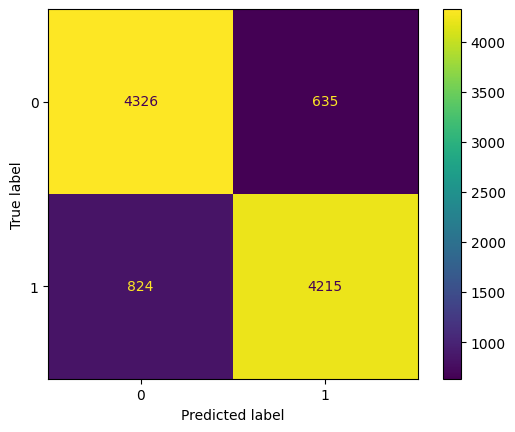

In [50]:
imdb_confusion_matrix = confusion_matrix(imdb_y_test, imdb_y_pred)

cm_plot = ConfusionMatrixDisplay(confusion_matrix = imdb_confusion_matrix, display_labels = imdb_model.classes_)
cm_plot.plot()

###ROC-AUC Score

ROC-AUC Score: 0.854238551873496


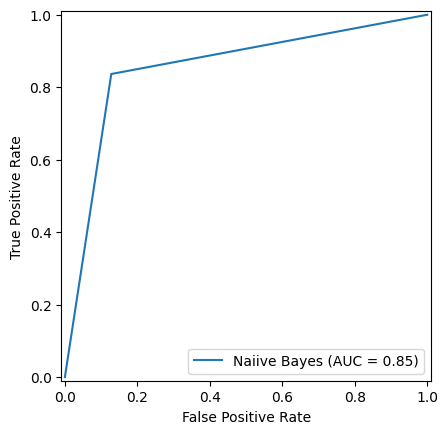

In [51]:
imdb_roc_auc_score = roc_auc_score(imdb_y_test, imdb_y_pred)

print(f"ROC-AUC Score: {imdb_roc_auc_score}")

imdb_fpr, imdb_tpr, imdb_thresolds = roc_curve(imdb_y_test, imdb_y_pred)
roc_plot = RocCurveDisplay(fpr=imdb_fpr, tpr=imdb_tpr, roc_auc = imdb_roc_auc_score, estimator_name= "Naiive Bayes")
roc_plot.plot()

#Feature Selection

##Load dataset and necessary libraries

In [37]:
from sklearn.datasets import load_breast_cancer

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, accuracy_score

##Basic EDA

In [17]:
data = load_breast_cancer()

cancer_df = pd.DataFrame(np.c_[data['data'], data['target']], columns = np.append(data['feature_names'], ['target']))
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [18]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [19]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


##Split Data into Train and Test

In [20]:
X = cancer_df.drop(['target'], axis = 1)
y = cancer_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

##Scaling Data

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Define Model: Logistic Regression

In [22]:
logistic_reg = LogisticRegression(max_iter=200)

##RFE - Recursive Feature Elimination

In [23]:
n_features_to_select = 5

rfe = RFE(estimator = logistic_reg, n_features_to_select = n_features_to_select)

rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=200), n_features_to_select=5)

##Visualize the ranking of features

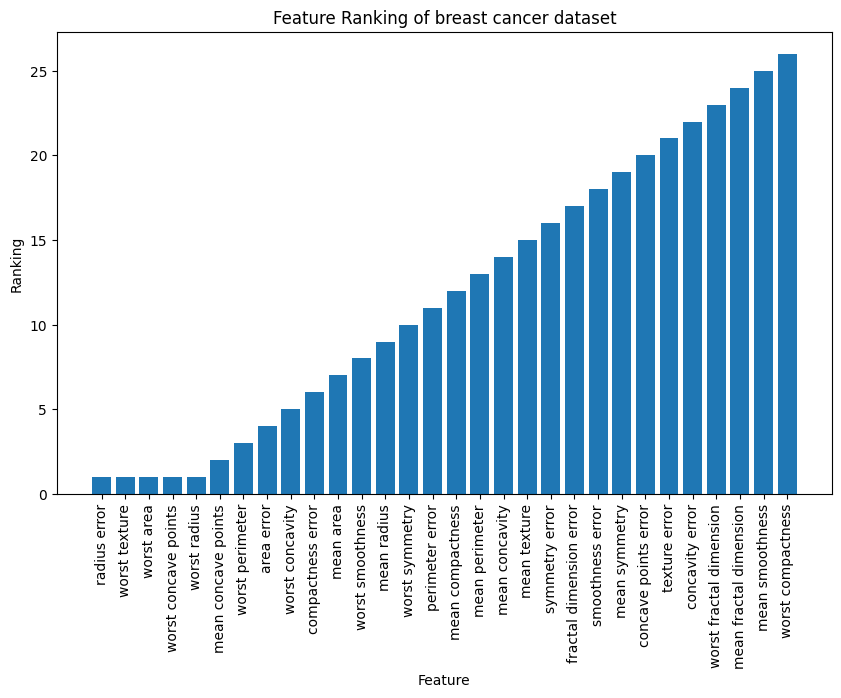

In [24]:
feature_ranking = rfe.ranking_

feature_names = data.feature_names
feature_ranking_df = pd.DataFrame({'Feature': feature_names, 'Ranking': feature_ranking})

sorted_feature_ranking = feature_ranking_df.sort_values(by = 'Ranking')

plt.figure(figsize=(10,6))
plt.bar(sorted_feature_ranking['Feature'], sorted_feature_ranking['Ranking'])
plt.xticks(rotation=90)
plt.ylabel('Ranking')
plt.xlabel('Feature')
plt.title('Feature Ranking of breast cancer dataset')
plt.show()

##Selected Top 5 features

In [25]:
selected_features = rfe.support_

selected_features_names = data.feature_names[selected_features].tolist()
print(f"Selected Features Names : {selected_features_names}")

Selected Features Names : ['radius error', 'worst radius', 'worst texture', 'worst area', 'worst concave points']


##Train with selected features

In [26]:
# Transforming the dataset to include only selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

logistic_reg.fit(X_train_rfe, y_train)

LogisticRegression(max_iter=200)

##Evaluation

In [27]:
y_pred = logistic_reg.predict(X_test_rfe)
evaluate_metric = classification_report(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)
print(f"Classification Report:\n{evaluate_metric}")
print(f"ROC-AUC Score: {roc_auc_score}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        43
         1.0       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC Score: 0.969701932525385


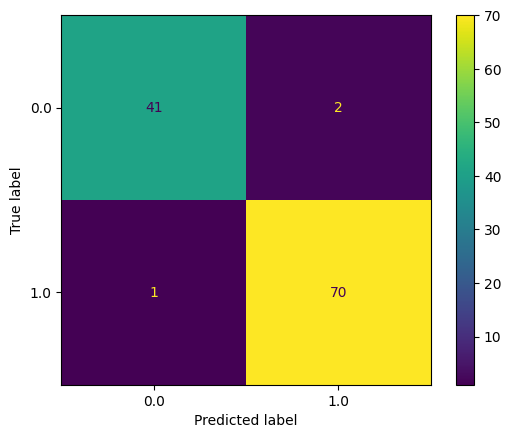

In [28]:
confusion_matrix = confusion_matrix(y_test, y_pred)

cm_plot = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = logistic_reg.classes_)
cm_plot.plot()

<class 'function'>


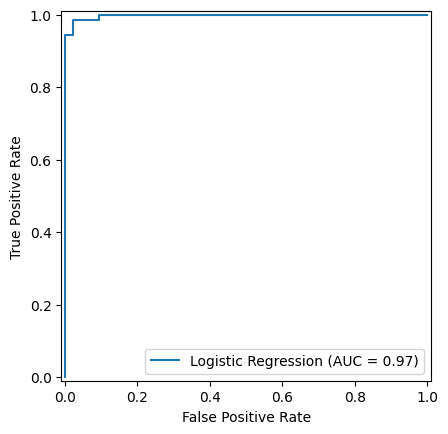

In [29]:
y_pred_proba = logistic_reg.predict_proba(X_test_rfe)[:, 1]
print(type(roc_curve))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_plot = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = roc_auc_score, estimator_name= "Logistic Regression")
roc_plot.plot()

##Compare Performance:All Features vs Selected Features

In [34]:
all_feature_logistic_reg = LogisticRegression(max_iter=200)

all_feature_logistic_reg.fit(X_train, y_train)

all_features_y_pred = logistic_reg.predict(X_test)

all_features_classification_report = classification_report(y_test, all_features_y_pred)

print(f"All features:\nClassification Report:\n{all_features_classification_report}")

print(f"Selected features:\nClassification Report:\n{evaluate_metric}")

All features:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        43
         1.0       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Selected features:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        43
         1.0       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



##Experiment

Number of features: 1 - Accuracy: 0.9473684210526315
Number of features: 2 - Accuracy: 0.956140350877193
Number of features: 3 - Accuracy: 0.9649122807017544
Number of features: 4 - Accuracy: 0.956140350877193
Number of features: 5 - Accuracy: 0.9736842105263158
Number of features: 6 - Accuracy: 0.9736842105263158
Number of features: 7 - Accuracy: 0.9736842105263158
Number of features: 8 - Accuracy: 0.9736842105263158
Number of features: 9 - Accuracy: 0.9736842105263158
Number of features: 10 - Accuracy: 0.9736842105263158


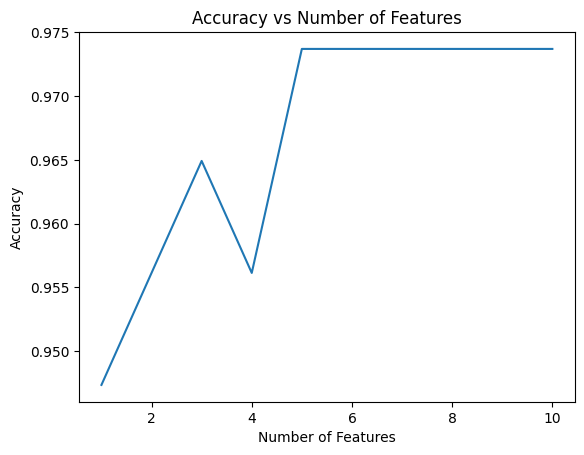

In [40]:
n_features_to_select = [1,2,3,4,5,6,7,8,9,10]
accuracy_list = []

for i in n_features_to_select:
  rfe = RFE(estimator = logistic_reg, n_features_to_select = i)
  X_train_rfe = rfe.fit_transform(X_train, y_train)
  X_test_rfe = rfe.transform(X_test)
  logistic_reg.fit(X_train_rfe, y_train)
  y_pred = logistic_reg.predict(X_test_rfe)
  accuracy_for_i = accuracy_score(y_test, y_pred)
  accuracy_list.append(accuracy_for_i)
  print(f"Number of features: {i} - Accuracy: {accuracy_for_i}")

plt.plot(n_features_to_select, accuracy_list)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Features')
plt.show()

MOdel performance was imporoved with increasing number of features, However selecting 5 or more feature didn't change the performance.